# UBC Scientific Software Seminar

## October 7, 2016

Today's Agenda:

* Overview of machine learning problems
* Exploring the scikit-learn documentation
* Get to know the sklearn API
* First examples with builtin datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 1. Overview of machine learning problems

"Machine Learning" is a broad term applied to the practice of using data to create models and make predictions. Common machine learning problems include curve fitting, spam filtering, recommendation algorithms, image recognition, etc. Machine learning problems generally fall into 2 categories:

* Supervised Learning (observed data includes labels)
    * Regression (to predict a continuous variable)
        * Salary versus years of work experience
        * House prices versus square footage
    * Classification (to predict a discrete variable)
        * Spam detection
        * Image recognition
        * Sentiment analysis
* Unsupervised Learning (observed data does not include labels)
    * Examples:
        * Classify customers using some retail website
        * Recommendation algorithms (such as Netflix, Amazon, etc.)
        * Separate different voices given an audio recording of several people speaking simultaneously
        * Classify distant galaxies

[scikit-learn](http://scikit-learn.org/) is one of the main machine learning packages for Python and the online documentation includes many [tutorials and examples](http://scikit-learn.org/stable/tutorial/index.html).

[Kaggle](https://www.kaggle.com/) hosts data science competitions and includes many example datasets, tutorials and code from competition winners.

## 2. Exploring the scikit-learn documentation

[scikit-learn.org](http://scikit-learn.org/) has extensive [documentation and tutorials](http://scikit-learn.org/stable/tutorial/basic/tutorial.html). Let's take a look...

## 3. Getting to know the sklearn API

sklearn is designed with a beautifully simple and consistent API and it comes down to:

1. Instantiate the model
2. Fit
3. Predict
4. Score

Let's make a fake dataset with a single feature and dive into some simple models!

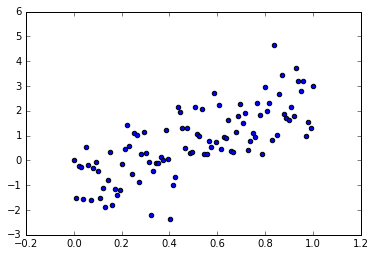

In [2]:
N = 100
x = np.linspace(0,1,N)
y = 3.21*x - 1.05 + np.random.randn(N) # Linear response variable with noise
plt.scatter(x,y);

#### 3.1 LinearRegression

**Instantiate.** The model to implement ordinary least squares regression is `LinearRegression` (which is contained in the `sklearn.linear_model` module):

In [3]:
from sklearn.linear_model import LinearRegression

`LinearRegression` is a class and "calling" the class returns an object -- an instance of the `LinearRegression` class.

In [4]:
reg = LinearRegression()

**Fit.** scikit-learn models always expect 2D arrays for the training data with samples down the rows and features across columns. Since our data `x` and `y` are 1D vectors, we need to use the NumPy array method `reshape` to make them 2D before we pass them into the `fit` method.

In [5]:
reg.fit(x.reshape(N,1),y.reshape(N,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The model is now fit and we can see the parameters of the linear model using the `coef_` and `intercept_` attributes of the model (which returns arrays of coefficients).

In [6]:
print('The linear model is:', reg.coef_[0][0], 'x + (', reg.intercept_[0], ')')

The linear model is: 3.51361610547 x + ( -1.01081127129 )


**Predict.** Let's make an new array of `x` values and use the model's `predict` method to compute `y` values and then plot the result.

In [7]:
X = np.linspace(0,1,10)
Y = reg.predict(X.reshape(10,1))

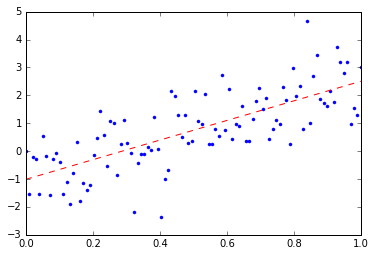

In [8]:
plt.plot(x,y,'b.',X,Y,'r--');

**Score.** We can evaluate the quality of the model using the `score` attribute... but we used all the data to build the model and there's none left to test the model. And it's very bad practice to test your model with data used to build the model! We'll have to be smarter next time by first splitting the data into a training set and a testing set!

#### 3.2 DecisionTreeRegressor

Let's try another model. The beauty of the design of scikit-learn becomes apparent when using another model on the same problem: only the name of the model will change in our code!

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
clf = DecisionTreeRegressor() # Instantiate the model

In [11]:
clf.fit(x.reshape(N,1),y.reshape(N,1)) # Fit the model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [12]:
X = np.linspace(0,1,100)
Y = clf.predict(X.reshape(100,1)) # Predict with the model

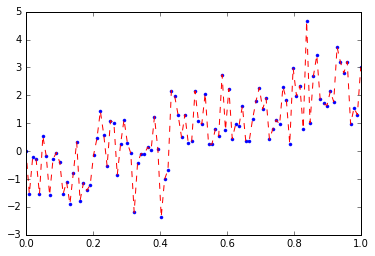

In [13]:
plt.plot(x,y,'b.',X,Y,'r--');

Notice that we don't even have to know what a decision tree is to use the model! That's a feature of the scikit-learn API but we need to be careful: we should understand the models that we use! We'll come back to decision trees later. And notice that this model is **overfitting**: it's paying way too much attention to the noise in our dataset. We'll talk more about overfitting later on also.

## 4. Examples with builtin datatsets

scikit-learn comes equipped with some example datasets. For example:

* Diabetes patients
* Hand-written digits 
* Boston house prices

Datasets are accessed in the [sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) module and are packaged in Bunch object. Let's take a look at the diabetes dataset.

Unfortunately, the documentation for the diabetes dataset doesn't explain what the features are. After a bit of Googling, we find [this website](http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) which hosts the dataset and provides and explanation:

>Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [14]:
from sklearn.datasets import load_diabetes

In [15]:
diabetes = load_diabetes()

The `load_diabetes` function returns a dictionary-like object which packages together the data therefore we can look inside using the `keys` method.

In [16]:
diabetes.keys()

dict_keys(['data', 'target'])

In [17]:
diabetes.data[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [18]:
diabetes.target[:5]

array([ 151.,   75.,  141.,  206.,  135.])

We can see the data has been normalized and checking the [webpage](http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html), we see that the columns are as follows:

In [19]:
names = ['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']

Let's put this in a pandas DataFrame object to get a feel for the data.

In [20]:
df = pd.DataFrame(diabetes.data,columns=names)

In [21]:
df['Y'] = diabetes.target.reshape(len(diabetes.target),1)

In [22]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


The `scatter_matrix` function in pandas is a great tool for visualizing a DataFrame.

In [23]:
from pandas.tools.plotting import scatter_matrix

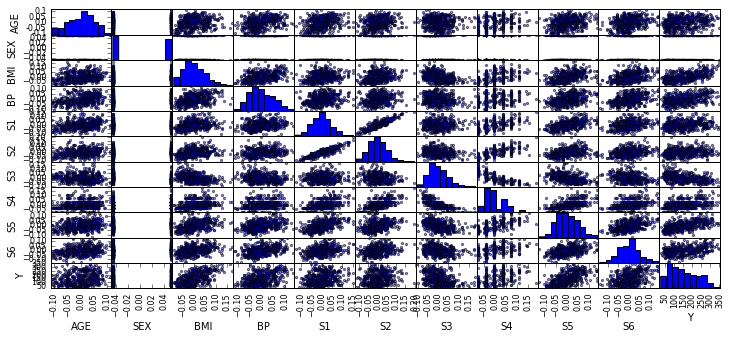

In [24]:
scatter_matrix(df,figsize=(12,5));

Now that we've taken a tour of the data, let's do a linear regression! Remember: instantiate, fit, predict, score!

In [25]:
reg_diabetes = LinearRegression()

In [26]:
reg_diabetes.fit(diabetes.data,diabetes.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
reg_diabetes.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [28]:
reg_diabetes.intercept_

152.13348416289651

Again, we used all the data to fit the model and now there's nothing to test on! We'll do that next time!